# Thresholding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Global Thresholding

Text(0.5, 1.0, 'Thresholded Image')

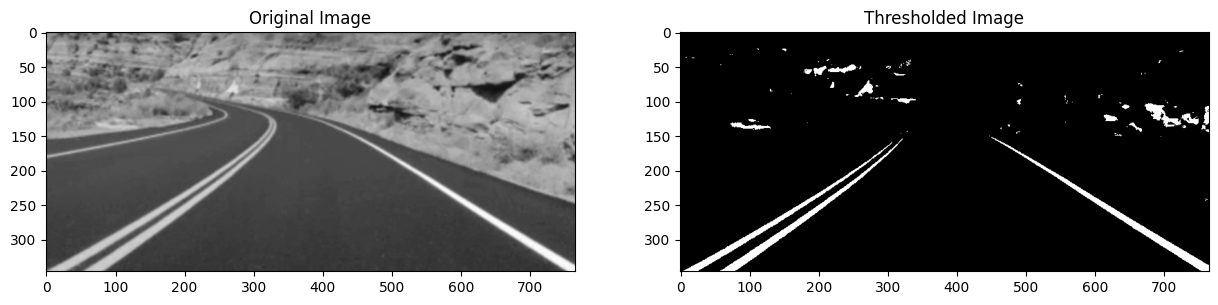

In [2]:
image = '../data/road_lanes.png'

img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# Binary Thresholding
retval, img_thresh = cv2.threshold(img, 165, 255, cv2.THRESH_BINARY)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(img, cmap='gray'); ax[0].set_title('Original Image')
ax[1].imshow(img_thresh, cmap='gray'); ax[1].set_title('Thresholded Image')

**Experiment with manual thresholding on color image**

In [17]:
retval

165.0

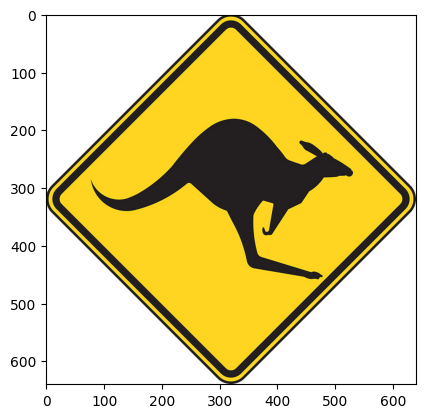

In [3]:
image = '../data/kangaroo.jpg'

img = cv2.imread(image)

# Convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots()
ax.imshow(img)

Before Thresholding:
r: median=255.0, mean=218.28668212890625
g: median=213.0, mean=202.21904296875
b: median=37.0, mean=134.414853515625
After Thresholding:
r: median=255.0, mean=212.9984619140625
g: median=255.0, mean=212.90819091796874
b: median=0.0, mean=117.083349609375


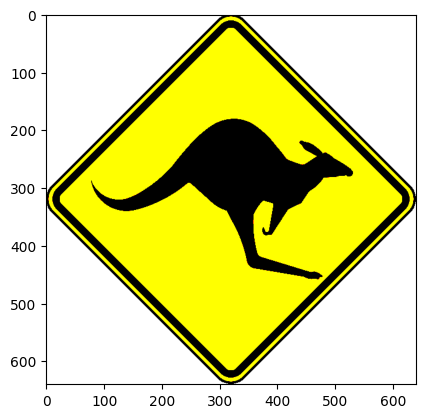

In [4]:
min = 126
max = 255

r,g,b = cv2.split(img)

r_thresh = r.copy()
g_thresh = g.copy()
b_thresh = b.copy()

print("Before Thresholding:")
print(f"r: median={np.median(r)}, mean={np.mean(r)}")
print(f"g: median={np.median(g)}, mean={np.mean(g)}")
print(f"b: median={np.median(b)}, mean={np.mean(b)}")

_, r_thresh = cv2.threshold(r, min, max, cv2.THRESH_BINARY)
_, g_thresh = cv2.threshold(g, min, max, cv2.THRESH_BINARY)
_, b_thresh = cv2.threshold(b, min, max, cv2.THRESH_BINARY)

merged = cv2.merge([r_thresh, g_thresh, b_thresh])

print("After Thresholding:")
print(f"r: median={np.median(r_thresh)}, mean={np.mean(r_thresh)}")
print(f"g: median={np.median(g_thresh)}, mean={np.mean(g_thresh)}")
print(f"b: median={np.median(b_thresh)}, mean={np.mean(b_thresh)}")

plt.imshow(merged)


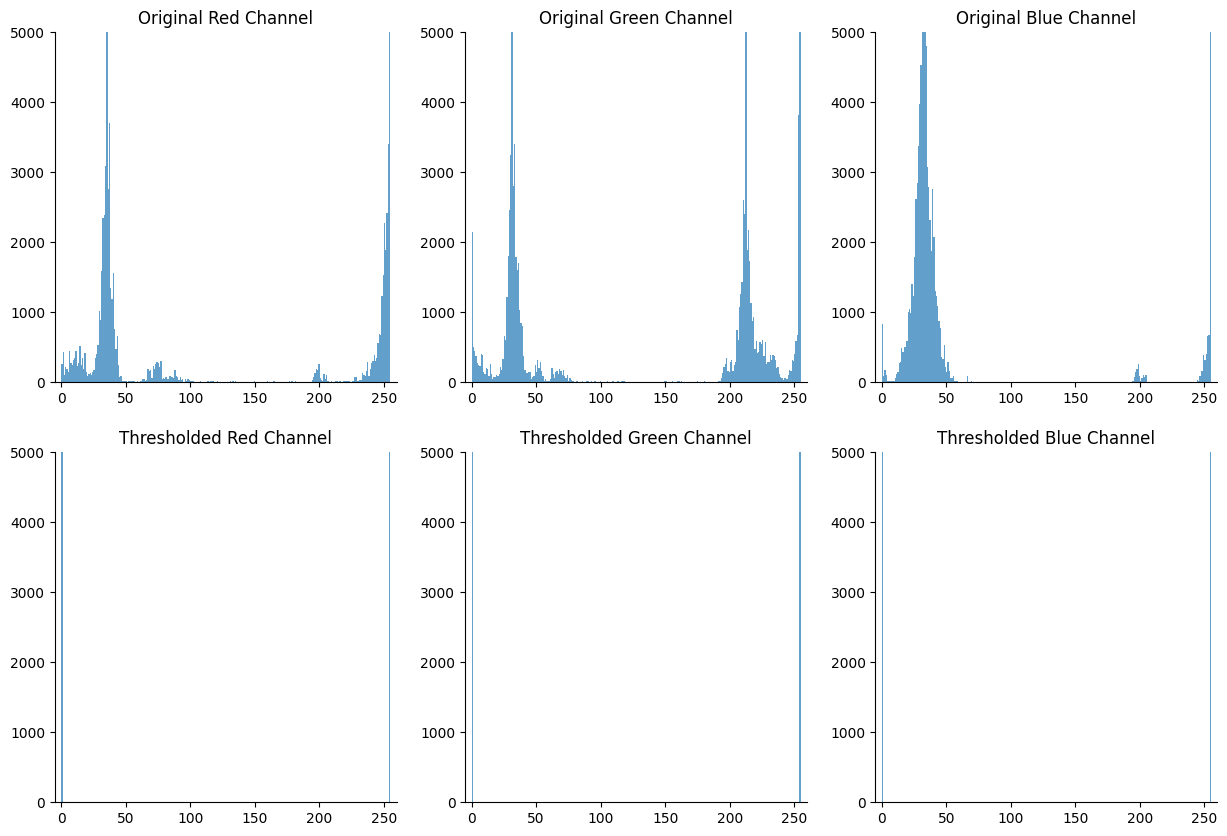

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0,0].hist(r.flatten(),bins=256, alpha=0.7); ax[0,0].set_title('Original Red Channel')
ax[0,1].hist(g.flatten(),bins=256, alpha=0.7); ax[0,1].set_title('Original Green Channel')
ax[0,2].hist(b.flatten(),bins=256, alpha=0.7); ax[0,2].set_title('Original Blue Channel')
ax[1,0].hist(r_thresh.flatten(),bins=256, alpha=0.7); ax[1,0].set_title('Thresholded Red Channel')
ax[1,1].hist(g_thresh.flatten(),bins=256, alpha=0.7); ax[1,1].set_title('Thresholded Green Channel')
ax[1,2].hist(b_thresh.flatten(),bins=256, alpha=0.7); ax[1,2].set_title('Thresholded Blue Channel')

ylim = [0, 5000]
xlim = [-5, 260]
for a in ax.flatten():
    a.set_xlim(xlim)
    a.set_ylim(ylim)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)



In [18]:
r_thresh.shape

(640, 640)

## Adaptive Thresholding

In [32]:
image = '../data/Piano_Sheet_Music.png'
img_orig = cv2.imread(image,cv2.IMREAD_UNCHANGED)
img =  cv2.imread(image, cv2.IMREAD_GRAYSCALE)

print(f'original shape: {img_orig.shape}')
print(f'grayscale shape: {img.shape}')  


original shape: (419, 554)
grayscale shape: (419, 554)


Text(0.5, 1.0, 'Adaptive Thresholding')

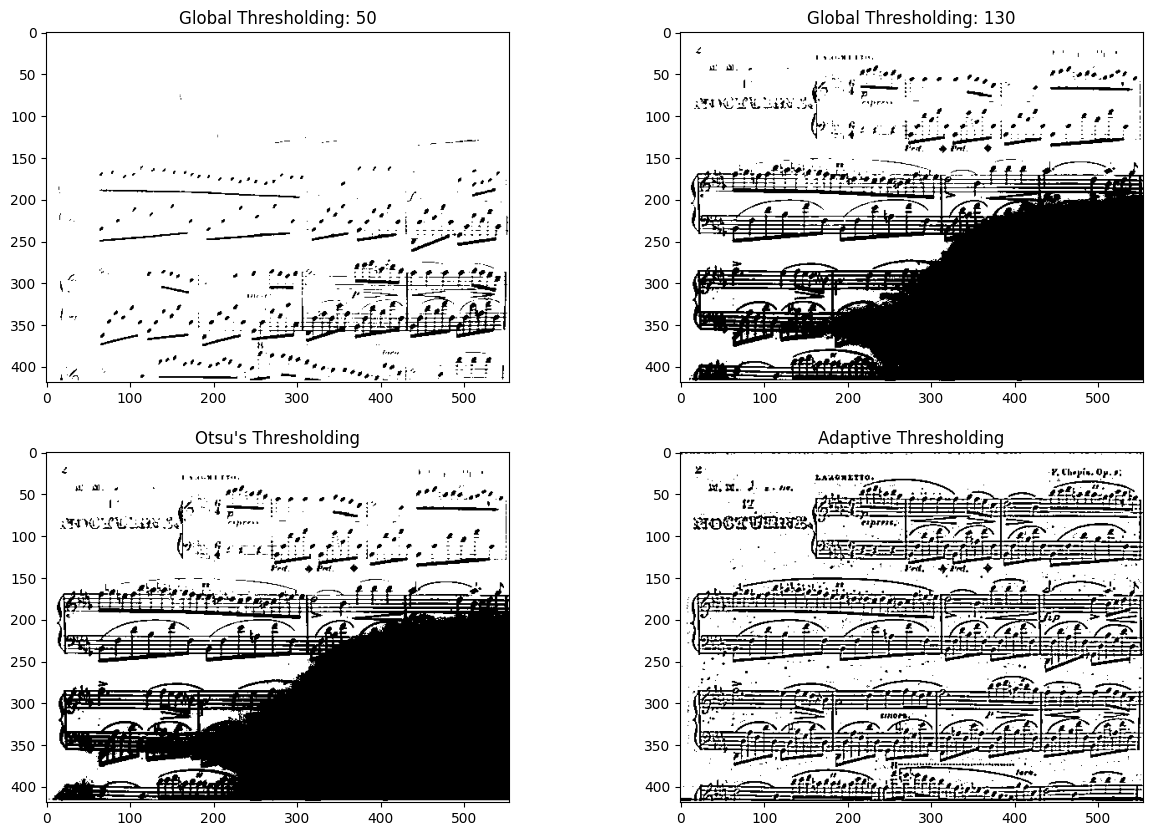

In [33]:
# Global Thresholding
img_global_thresh = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)[1]

# Global Thresholding
img_global_thresh1 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)[1]

# Global Thresholding + Otsu's Binarization
img_otsu_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# Adaptive Thresholding
img_adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 3)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0,0].imshow(img_global_thresh, cmap='gray'); ax[0,0].set_title('Global Thresholding: 50')
ax[0,1].imshow(img_global_thresh1, cmap='gray'); ax[0,1].set_title('Global Thresholding: 130')
ax[1,0].imshow(img_otsu_thresh, cmap='gray'); ax[1,0].set_title("Otsu's Thresholding")
ax[1,1].imshow(img_adaptive_thresh, cmap='gray'); ax[1,1].set_title('Adaptive Thresholding')


**Practice**

Text(0.5, 1.0, 'Adaptive Thresholding')

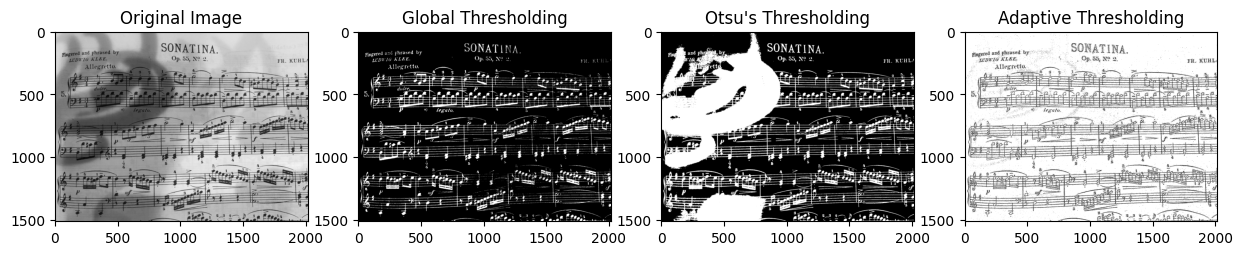

In [44]:
image = '../data/Sheet_Music_Test-1.jpg'

img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# Global Thresholding
img_global_thresh = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY_INV)[1]

# Otus's Binarization
img_otsu_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

# Adaptive Thresholding
img_adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 4)

fig, ax = plt.subplots(1, 4, figsize=(15, 10))
ax[0].imshow(img, cmap='gray'); ax[0].set_title('Original Image')
ax[1].imshow(img_global_thresh, cmap='gray'); ax[1].set_title('Global Thresholding')
ax[2].imshow(img_otsu_thresh, cmap='gray'); ax[2].set_title("Otsu's Thresholding")
ax[3].imshow(img_adaptive_thresh, cmap='gray'); ax[3].set_title('Adaptive Thresholding')